# Project 2: Exploratory Data Analysis (EDA)
## Wellbeing and Retention Patterns at GlobalWorks

**Consultant:** Mohamed Bucheeri  
**Client:** GlobalWorks (fictional)  
**Role:** People Data Analytics Consultant (External)
**Industry:** Legal Operations, Compliance Services, and Audit Risk Management

### Introduction
This project analyses GlobalWorks’ HR, engagement, and training data to understand how employee wellbeing varies across the organisation. The analysis focuses on engagement, satisfaction, and work–life balance, and explores how these patterns differ across divisions and relate to employee exit behaviour.

*GlobalWorks is a fictional organisation, and the dataset used in this project is synthetic and adapted for educational purposes.*

## Problem Statement
GlobalWorks’ most recent HR and engagement data reveal a wide gap in wellbeing, with average engagement ranging from about 2.1 to 4.0 and work–life balance from roughly 2.5 to 3.4 on the 1–5 scale, while exit rates range from around 41% to nearly 100%, and remains high even after excluding retirements. The organisation seeks to link these disparities to employee exits to identify which divisions are at heightened risk of avoidable turnover.

## Project Aim
To assess how employee wellbeing varies across divisions at GlobalWorks and explore how these differences relate to exit behaviour in order to identify divisions facing elevated retention risk.

## EDA Objectives
1. Summarise overall engagement, satisfaction, and work–life balance across the workforce.  
2. Compare division-level wellbeing to identify divisions with significantly lower sentiment.  
3. Examine how divisional wellbeing patterns differ between areas with higher and lower exit rates.
4. Distinguish avoidable vs non-avoidable exits and assess how each relates to wellbeing by division.  
5. Identify divisions that show weaker wellbeing and higher (avoidable) exit rates to prioritise retention support.

## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import scipy.stats as stats

pd.set_option("display.max_columns", None)

## 2. Load Data
This section loads all datasets used in the wellbeing and retention analysis.
Relative paths are used to ensure the notebook remains reproducible across different environments.

In [2]:
data_dir = "../data"

# Load datasets
employee = pd.read_csv(os.path.join(data_dir, "employee_data.csv"))
engagement = pd.read_csv(os.path.join(data_dir, "employee_engagement_survey_data.csv"))
training = pd.read_csv(os.path.join(data_dir, "training_and_development_data.csv"))
recruitment = pd.read_csv(os.path.join(data_dir, "recruitment_data.csv"))

## 3. Initial Data Overview
Before cleaning or feature engineering, this section provides a structured first look at each dataset.
To keep the workflow organised and readable, the overview includes:
- A structural summary table showing row counts, missing values, and duplicate entries.
- Four preview tables using `.head()` for each dataset.  

## 3.1 Dataset Structural Summary
Below is the combined structural summary for all four datasets.

### Table 3.1: Structural Summary of All Datasets

In [3]:
def dataset_summary(name, df):
    return pd.DataFrame({
        "Dataset": [name],
        "Rows": [df.shape[0]],
        "Columns": [df.shape[1]],
        "Missing Values": [df.isna().sum().sum()],
        "Duplicate Rows": [df.duplicated().sum()]})

# Summary table
summary_tables = [dataset_summary("Employee Data", employee), dataset_summary("Engagement Data", engagement), dataset_summary("Training Data", training), dataset_summary("Recruitment Data", recruitment)]
summary_df = pd.concat(summary_tables, ignore_index=True)
summary_df

,Dataset,Rows,Columns,Missing Values,Duplicate Rows
0,Employee Data,3000,26,2934,0
1,Engagement Data,3000,5,0,0
2,Training Data,3000,9,0,0
3,Recruitment Data,3000,18,0,0


### Table 3.2: Preview of Employee Data (First 10 Rows - Raw)
The table below shows the first ten records from the employee dataset.  
This preview helps confirm variable types, date formats, missing values, and overall structure.

In [4]:
employee.head(10)

,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,TerminationType,TerminationDescription,DepartmentType,Division,DOB,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
0,3427,Uriah,Bridges,20-Sep-19,NaN,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,Contract,Zone C,Temporary,Unk,NaN,Production,Finance & Accounting,07-10-1969,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4
1,3428,Paula,Small,11-Feb-23,NaN,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,Contract,Zone A,Part-Time,Unk,NaN,Production,Aerial,30-08-1965,MA,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3
2,3429,Edward,Buck,10-Dec-18,NaN,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,Full-Time,Zone B,Part-Time,Unk,NaN,Sales,General - Sga,06-10-1991,MA,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4
3,3430,Michael,Riordan,21-Jun-21,NaN,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,Contract,Zone A,Full-Time,Unk,NaN,Sales,Finance & Accounting,04-04-1998,ND,Clerk,Male,58782,Other,Single,Fully Meets,2
4,3431,Jasmine,Onque,29-Jun-19,NaN,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,Contract,Zone A,Temporary,Unk,NaN,Sales,General - Con,29-08-1969,FL,Laborer,Female,33174,Other,Married,Fully Meets,3
5,3432,Maruk,Fraval,17-Jan-20,NaN,Area Sales Manager,Sheri Campos,maruk.fraval@bilearner.com,BPC,Active,Contract,Zone B,Full-Time,Unk,NaN,Sales,Field Operations,03-04-1949,CT,Driver,Male,6050,Black,Married,Fully Meets,3
6,3433,Latia,Costa,06-Apr-22,03-Jul-23,Area Sales Manager,Jacob Braun,latia.costa@bilearner.com,WBL,Active,Full-Time,Zone B,Temporary,Involuntary,Me see picture nature degree benefit.,Sales,General - Eng,01-07-1942,CA,Technician,Female,90007,Hispanic,Divorced,Exceeds,4
7,3434,Sharlene,Terry,06-Nov-20,29-Jan-23,Area Sales Manager,Tracy Marquez,sharlene.terry@bilearner.com,CCDR,Active,Contract,Zone C,Full-Time,Involuntary,Blue community type skill story.,Sales,Engineers,07-03-1957,OR,Engineer,Female,97756,White,Divorced,Fully Meets,2
8,3435,Jac,McKinzie,18-Aug-18,NaN,Area Sales Manager,Sharon Becker,jac.mckinzie@bilearner.com,NEL,Active,Contract,Zone B,Part-Time,Unk,NaN,Sales,Executive,15-05-1974,TX,Executive Assistant,Male,78789,Black,Widowed,Exceeds,3
9,3436,Joseph,Martins,21-Jan-22,29-Jun-23,Area Sales Manager,George Jenkins,joseph.martins@bilearner.com,BPC,Active,Part-Time,Zone B,Temporary,Resignation,Summer personal bag.,Sales,Engineers,11-11-1949,TX,Engineer,Male,78207,Asian,Widowed,Fully Meets,5


### Table 3.2: Engagement Survey Data (First 10 Rows - Raw)
This table displays the first ten survey responses, including engagement, satisfaction, and work–life balance scores.  
It provides an initial view of scoring patterns before any cleaning or merging.

In [5]:
engagement.head(10)

,Employee ID,Survey Date,Engagement Score,Satisfaction Score,Work-Life Balance Score
0,1001,10-10-2022,2,5,5
1,1002,03-08-2023,4,5,3
2,1003,03-01-2023,2,5,2
3,1004,30-07-2023,3,5,3
4,1005,19-06-2023,2,4,5
5,1006,03-05-2023,5,2,1
6,1007,18-07-2023,2,1,5
7,1008,21-06-2023,5,2,2
8,1009,06-06-2023,2,5,1
9,1010,15-09-2022,2,4,2


### Table 3.3: Training and Development Data (First 10 Rows - Raw)
The first ten training records are shown below, covering program type, outcome, duration, and cost.  
This preview helps assess training consistency and outcome categories.

In [6]:
training.head(10)

,Employee ID,Training Date,Training Program Name,Training Type,Training Outcome,Location,Trainer,Training Duration(Days),Training Cost
0,1001,21-Sep-22,Customer Service,Internal,Failed,Port Greg,Amanda Daniels,4,510.83
1,1002,19-Jul-23,Leadership Development,Internal,Failed,Brandonview,Brittany Chambers,2,582.37
2,1003,24-Feb-23,Technical Skills,Internal,Incomplete,Port Briannahaven,Mark Roberson,4,777.06
3,1004,12-Jan-23,Customer Service,Internal,Completed,Knightborough,Richard Fisher,2,824.30
4,1005,12-May-23,Communication Skills,External,Passed,Bruceshire,Heather Shaffer,4,145.99
5,1006,08-May-23,Project Management,Internal,Failed,Erinfort,Michael Duke,2,838.07
6,1007,14-May-23,Leadership Development,External,Failed,New Christopher,Virginia Clayton DVM,2,667.32
7,1008,02-Aug-23,Technical Skills,External,Incomplete,Lowemouth,Erica Maxwell,2,758.18
8,1009,21-Aug-22,Customer Service,Internal,Incomplete,Johnland,Katelyn Hartman,2,101.21
9,1010,19-Aug-22,Communication Skills,External,Incomplete,Lake Kimfurt,Rhonda Clark,5,332.25


### Table 3.4: Recruitment Data (First 10 Rows - Raw)
The table below shows the first ten entries from the recruitment dataset.  
This provides an overview of applicant demographics, experience, salary expectations, and application status.

In [7]:
recruitment.head(10)

,Applicant ID,Application Date,First Name,Last Name,Gender,Date of Birth,Phone Number,Email,Address,City,State,Zip Code,Country,Education Level,Years of Experience,Desired Salary,Job Title,Status
0,1001,03-Jun-23,Scott,Sheppard,Male,31-08-1992,421-429-7655x39421,perezjanet@example.org,597 Smith Point,Hollandfort,NV,57588,Micronesia,High School,8,60103.21,Chief Technology Officer,Interviewing
1,1002,15-May-23,Stanley,Lewis,Male,29-04-1965,+1-451-574-5308x1681,grossmark@example.com,8116 Stuart Loop,Port Margaretfurt,TN,14726,Greenland,Bachelor's Degree,17,64575.84,"Designer, furniture",Rejected
2,1003,04-Aug-23,Javier,Li,Female,10-03-1973,(858)901-5499,katiemaldonado@example.com,5940 Barr Villages Suite 075,Dianaland,TX,4699,China,PhD,20,39422.71,"Sound technician, broadcasting/film/video",Rejected
3,1004,28-Jul-23,Christopher,Johnston,Other,04-04-2001,(853)681-1839x2010,sheila73@example.com,442 Lewis Mount,Youngfurt,GA,34455,Ghana,High School,8,51045.11,Air cabin crew,Rejected
4,1005,05-Jun-23,Melissa,Hicks,Other,17-06-1978,364-575-8478x67812,emilypatterson@example.org,95961 Taylor Circles Apt. 169,East Ashleyborough,IN,21014,Solomon Islands,Master's Degree,0,52792.86,Art therapist,Interviewing
5,1006,26-Jul-23,Christian,Maddox,Female,14-06-1983,(894)940-2919,pvelasquez@example.net,3030 Bell Islands,Boonefort,NC,34763,Liberia,Master's Degree,18,97746.62,"Engineer, electronics",In Review
6,1007,09-Jun-23,Paul,Hammond,Female,16-08-1963,##############################################...,aclayton@example.net,58473 Jenna Trail,Port Barry,GA,57472,Congo,High School,11,80119.39,"Scientist, research (maths)",Offered
7,1008,15-Jul-23,Madison,Williamson,Male,07-09-1978,001-902-992-9557x692,jeffreyellis@example.com,24740 Gregory Stravenue Suite 212,New Luisfort,VA,71682,Pitcairn Islands,Bachelor's Degree,0,41578.78,"Teacher, primary school",Offered
8,1009,16-Jun-23,Rachael,Duran,Male,11-09-1997,+1-738-583-6354x63335,hamptontimothy@example.net,375 Flowers Well,Amandashire,PW,25218,Spain,High School,15,44489.60,Phytotherapist,Interviewing
9,1010,25-May-23,Sherri,Taylor,Male,24-04-1983,915.372.0499,cshaw@example.net,037 Quinn Route,Garrisonmouth,CA,82074,Gabon,Master's Degree,4,97363.53,"Pilot, airline",Offered


## 4. Data Cleaning
This section prepares all datasets for merging and analysis.  
Cleaning steps focus on standardising identifiers, fixing date formats, handling missing values, and ensuring consistency across categorical fields.

### 4.1 Standardise Column Names
To ensure smooth merging, all employee identifiers are renamed to a common field: `empid`.  
Column names are also converted to lowercase and snake case for consistency.

In [8]:
employee = employee.rename(columns={"EmpID": "EmployeeID"})
engagement = engagement.rename(columns={"Employee ID": "EmployeeID"})
training = training.rename(columns={"Employee ID": "EmployeeID"})

### 4.2 Convert Date Fields to Datetime Format

In [9]:
date_formats_emp = {"StartDate": "%d-%b-%y", "ExitDate": "%d-%b-%y", "DOB": "%d-%m-%Y",}

# Engagement
for col in ["Survey Date"]:
    engagement[col] = pd.to_datetime(engagement[col], format="%d-%m-%Y", errors="coerce")

# Employee
for col, fmt in date_formats_emp.items():
    employee[col] = pd.to_datetime(employee[col], format=fmt, errors="coerce")

# Training
training["Training Date"] = pd.to_datetime(training["Training Date"], format="%d-%b-%y", errors="coerce")

# Recruitment
recruitment["Application Date"] = pd.to_datetime(recruitment["Application Date"], format="%d-%b-%y", errors="coerce")
recruitment["Date of Birth"] = pd.to_datetime(recruitment["Date of Birth"], format="%d-%m-%Y", errors="coerce")

### 4.3 Handle Missing Values
These values are deliberately kept as `NaT` at this stage so exit behaviour can be flagged accurately in **Section 5. Feature Engineering**.

In [10]:
employee["ExitDate"] = employee["ExitDate"].fillna(pd.NaT)

### 4.3 Validate ID Fields
To avoid mismatched merges, engagement and training datasets are filtered to include only valid employee identifiers.

In [11]:
valid_ids = set(employee["EmployeeID"])
engagement = engagement[engagement["EmployeeID"].isin(valid_ids)]
training = training[training["EmployeeID"].isin(valid_ids)]

### 4.4 Clean Categorical Fields
Categorical variables across all datasets may contain irregular casing, spacing, or formatting. All string fields are cleaned by trimming whitespace and applying consistent title casing.

In [12]:
def clean_strings(df):
    for col in df.select_dtypes(include="object"):
        df[col] = df[col].str.strip().str.title()
    return df

employee = clean_strings(employee)
engagement = clean_strings(engagement)
training = clean_strings(training)

### 4.5 Merge Cleaned Datasets
All datasets are merged into a single employee-level table centred on the HR record. This creates a unified structure for analysing wellbeing, division patterns, training exposure, and exit behaviour.

In [13]:
employee_full = (employee.merge(engagement, on="EmployeeID", how="left").merge(training, on="EmployeeID", how="left"))

### 4.6 Merged Dataset Preview (First 10 Rows)

### Table 4.1: Merged Dataset Structural Summary

In [14]:
employee_full.head(10)

,EmployeeID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,TerminationType,TerminationDescription,DepartmentType,Division,DOB,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating,Survey Date,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Date,Training Program Name,Training Type,Training Outcome,Location,Trainer,Training Duration(Days),Training Cost
0,3427,Uriah,Bridges,2019-09-20,NaT,Production Technician I,Peter Oneill,Uriah.Bridges@Bilearner.Com,Ccdr,Active,Contract,Zone C,Temporary,Unk,NaN,Production,Finance & Accounting,1969-10-07,Ma,Accounting,Female,34904,White,Widowed,Fully Meets,4,2023-01-14,1,2,3,2023-07-15,Leadership Development,Internal,Failed,South Marisa,Taylor Rodriguez,2,606.11
1,3428,Paula,Small,2023-02-11,NaT,Production Technician I,Renee Mccormick,Paula.Small@Bilearner.Com,Ew,Active,Contract,Zone A,Part-Time,Unk,NaN,Production,Aerial,1965-08-30,Ma,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3,2022-09-09,2,1,5,2022-09-12,Customer Service,External,Incomplete,Tammieville,Kelly Patterson Dds,4,673.02
2,3429,Edward,Buck,2018-12-10,NaT,Area Sales Manager,Crystal Walker,Edward.Buck@Bilearner.Com,Pl,Active,Full-Time,Zone B,Part-Time,Unk,NaN,Sales,General - Sga,1991-10-06,Ma,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4,2023-05-27,1,2,1,2022-08-13,Leadership Development,External,Failed,East Roberthaven,Taylor Thomas,2,413.28
3,3430,Michael,Riordan,2021-06-21,NaT,Area Sales Manager,Rebekah Wright,Michael.Riordan@Bilearner.Com,Ccdr,Active,Contract,Zone A,Full-Time,Unk,NaN,Sales,Finance & Accounting,1998-04-04,Nd,Clerk,Male,58782,Other,Single,Fully Meets,2,2023-06-16,5,5,4,2022-12-15,Project Management,External,Completed,Garzatown,Holly Elliott,3,663.78
4,3431,Jasmine,Onque,2019-06-29,NaT,Area Sales Manager,Jason Kim,Jasmine.Onque@Bilearner.Com,Tns,Active,Contract,Zone A,Temporary,Unk,NaN,Sales,General - Con,1969-08-29,Fl,Laborer,Female,33174,Other,Married,Fully Meets,3,2022-11-25,2,5,3,2023-07-13,Technical Skills,External,Failed,Lake Meganville,Donald Martinez,5,399.03
5,3432,Maruk,Fraval,2020-01-17,NaT,Area Sales Manager,Sheri Campos,Maruk.Fraval@Bilearner.Com,Bpc,Active,Contract,Zone B,Full-Time,Unk,NaN,Sales,Field Operations,1949-04-03,Ct,Driver,Male,6050,Black,Married,Fully Meets,3,2022-12-12,2,3,5,2023-04-18,Project Management,Internal,Passed,Kingchester,Holly Sloan,2,820.33
6,3433,Latia,Costa,2022-04-06,2023-07-03,Area Sales Manager,Jacob Braun,Latia.Costa@Bilearner.Com,Wbl,Active,Full-Time,Zone B,Temporary,Involuntary,Me See Picture Nature Degree Benefit.,Sales,General - Eng,1942-07-01,Ca,Technician,Female,90007,Hispanic,Divorced,Exceeds,4,2023-03-25,1,5,2,2022-08-06,Customer Service,External,Passed,Lancehaven,David Stewart,5,295.08
7,3434,Sharlene,Terry,2020-11-06,2023-01-29,Area Sales Manager,Tracy Marquez,Sharlene.Terry@Bilearner.Com,Ccdr,Active,Contract,Zone C,Full-Time,Involuntary,Blue Community Type Skill Story.,Sales,Engineers,1957-03-07,Or,Engineer,Female,97756,White,Divorced,Fully Meets,2,2023-04-21,1,4,2,2022-10-07,Leadership Development,Internal,Passed,Jeremyshire,Stephanie Garza,3,790.15
8,3435,Jac,Mckinzie,2018-08-18,NaT,Area Sales Manager,Sharon Becker,Jac.Mckinzie@Bilearner.Com,Nel,Active,Contract,Zone B,Part-Time,Unk,NaN,Sales,Executive,1974-05-15,Tx,Executive Assistant,Male,78789,Black,Widowed,Exceeds,3,2022-12-09,4,3,3,2023-07-19,Customer Service,Internal,Passed,West Randall,John Brown,3,798.40
9,3436,Joseph,Martins,2022-01-21,2023-06-29,Area Sales Manager,George Jenkins,Joseph.Martins@Bilearner.Com,Bpc,Active,Part-Time,Zone B,Temporary,Resignation,Summer Personal Bag.,Sales,Engineers,1949-11-11,Tx,Engineer,Male,78207,Asian,Widowed,Fully Meets,5,2023-07-30,5,5,2,2023-04-09,Leadership Development,Internal,Failed,Nicolebury,Megan Wilson,5,192.61


## 5. Feature Engineering
This section creates variables required to the analyse employee exit behaviour alongside the dataset's given sentiment scores (Engagement Score, Satisfaction Score, and Work-Life Balance Score).

### 5.1 Effective End Date

In [15]:
today = pd.to_datetime("today").normalize()
employee_full["Effective End Date"] = employee_full["ExitDate"].fillna(today)

### 5.2 Exit Flag
A binary indicator is created to identify whether an employee has left the organisation. This variable is used to calculate exit rates and compare outcomes across divisions.

In [16]:
employee_full["Exit Flag"] = employee_full["ExitDate"].notna().astype(int)

A value of 1 indicates an exited employee, while 0 indicates an active employee.

### 5.3 Engineered Dataset Preview
The table below shows the first ten rows of the engineered dataset after the engineered variables have been added, excluding columns that will not be useful in the upcoming EDA analysis. It confirms that exit status and effective end dates are defined consistently while retaining the original wellbeing scores used in the analysis.

### Table 5.1: Engineered Dataset Preview (First 10 Rows)

In [18]:
employee_full[["EmployeeID","StartDate","ExitDate","Effective End Date","TerminationType","Division","Exit Flag","Engagement Score","Satisfaction Score","Work-Life Balance Score"]].head(10)

,EmployeeID,StartDate,ExitDate,Effective End Date,TerminationType,Division,Exit Flag,Engagement Score,Satisfaction Score,Work-Life Balance Score
0,3427,2019-09-20,NaT,2025-12-14,Unk,Finance & Accounting,0,1,2,3
1,3428,2023-02-11,NaT,2025-12-14,Unk,Aerial,0,2,1,5
2,3429,2018-12-10,NaT,2025-12-14,Unk,General - Sga,0,1,2,1
3,3430,2021-06-21,NaT,2025-12-14,Unk,Finance & Accounting,0,5,5,4
4,3431,2019-06-29,NaT,2025-12-14,Unk,General - Con,0,2,5,3
5,3432,2020-01-17,NaT,2025-12-14,Unk,Field Operations,0,2,3,5
6,3433,2022-04-06,2023-07-03,2023-07-03,Involuntary,General - Eng,1,1,5,2
7,3434,2020-11-06,2023-01-29,2023-01-29,Involuntary,Engineers,1,1,4,2
8,3435,2018-08-18,NaT,2025-12-14,Unk,Executive,0,4,3,3
9,3436,2022-01-21,2023-06-29,2023-06-29,Resignation,Engineers,1,5,5,2


## 6. Exploratory Data Analysis (EDA)
This section examines wellbeing patterns across the workforce, focusing on how engagement, satisfaction, and work–life balance vary across the organisation. It also explores differences across divisions and how these wellbeing measures relate to employee exit behaviour.

### 6.1 Overall Wellbeing Distribution
This subsection summarises the distribution of engagement, satisfaction, and work–life balance scores across all employees. These distributions provide a baseline understanding of organisational wellbeing before examining differences across divisions or exit groups.

#### Figure 6.1: Distribution of Engagement, Satisfaction, and Work–Life Balance Scores

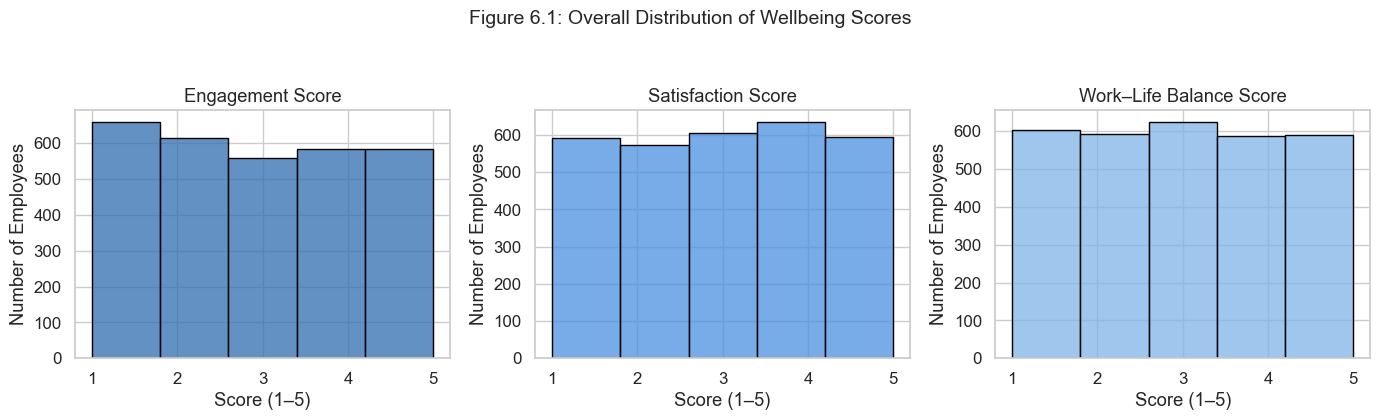

In [19]:
sns.set_theme(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(14,4))
cols = ["Engagement Score", "Satisfaction Score", "Work-Life Balance Score"]
titles = ["Engagement Score", "Satisfaction Score", "Work–Life Balance Score"]
colors = ["#2f6db0", "#4a90e2", "#7fb3e6"]
for i, (col, title, c) in enumerate(zip(cols, titles, colors), 1):
    plt.subplot(1,3,i)
    sns.histplot(employee_full[col], bins=5, color=c, edgecolor="black")
    plt.title(title)
    plt.xlabel("Score (1–5)")
    plt.ylabel("Number of Employees")
plt.suptitle("Figure 6.1: Overall Distribution of Wellbeing Scores", y=1.05, fontsize=14)
plt.tight_layout()
plt.show()

### Interpretation
Figure 6.1 shows a broadly even spread of engagement, satisfaction, and work–life balance scores across the 1–5 scale, with most employees clustered around mid-range values. This indicates that overall sentiment across the organisation is mixed rather than uniformly high or low. The absence of strong skewness suggests that later comparisons across divisions and exit groups are unlikely to be driven by artefacts of the overall score distribution.

### 6.2 Wellbeing Across Divisions
This subsection examines whether wellbeing differs across divisions, helping to identify areas where employee sentiment may be weaker.

#### **Figure 6.2: Mean Wellbeing Scores by Division (Heatmap)**

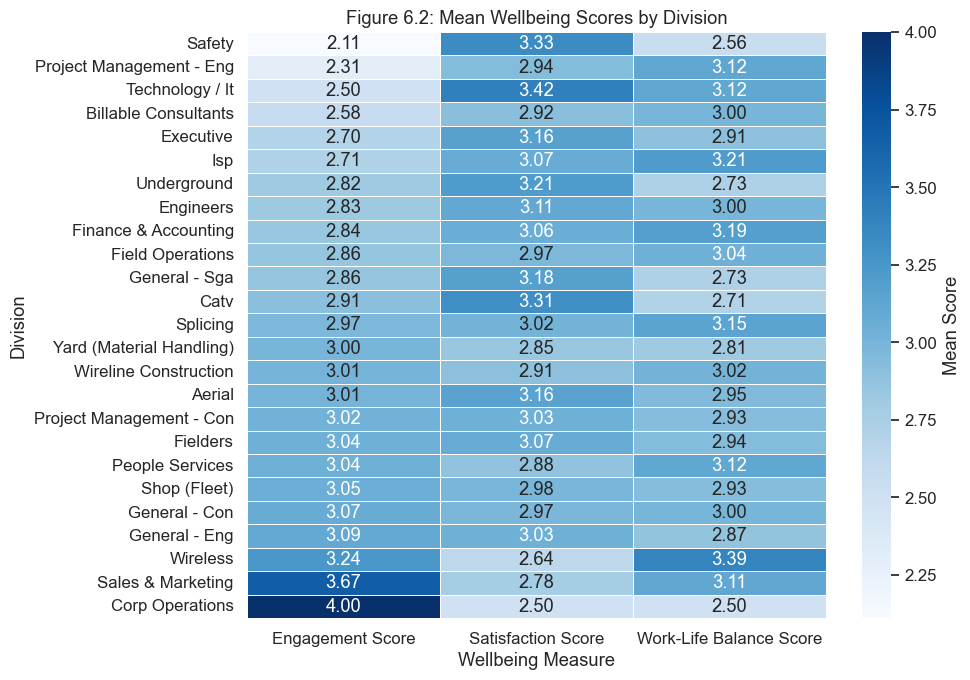

In [20]:
division_scores = (employee_full.groupby("Division")[["Engagement Score", "Satisfaction Score", "Work-Life Balance Score"]].mean().sort_values("Engagement Score"))
plt.figure(figsize=(10,7))
sns.heatmap(division_scores, annot=True, cmap="Blues", fmt=".2f", linewidths=.5, cbar_kws={"label": "Mean Score"})
plt.title("Figure 6.2: Mean Wellbeing Scores by Division")
plt.xlabel("Wellbeing Measure")
plt.ylabel("Division")
plt.tight_layout()
plt.show()

### Interpretation
The heatmap reveals clear variation in wellbeing across divisions. Divisions such as Safety, Project Management – Eng, and Technology / IT report consistently lower engagement scores, typically between 2.1 and 2.5, alongside relatively weak work–life balance.

In contrast, divisions such as Sales & Marketing, Wireless, and Corp Operations show higher engagement, although this does not always coincide with stronger satisfaction or work–life balance. This suggests that engagement alone does not fully capture overall wellbeing, and that workload and job structure may differ substantially across divisions.

Overall, wellbeing appears structurally uneven across the organisation, which means we need to examine whether these disparities are reflected in employee exit patterns.

### 6.3 Exit Rates Across Divisions
This subsection explores variation in employee exit rates across divisions and assesses whether divisions with weaker wellbeing also experience higher turnover.

#### **Figure 6.3: Exit Rate (%) by Division**

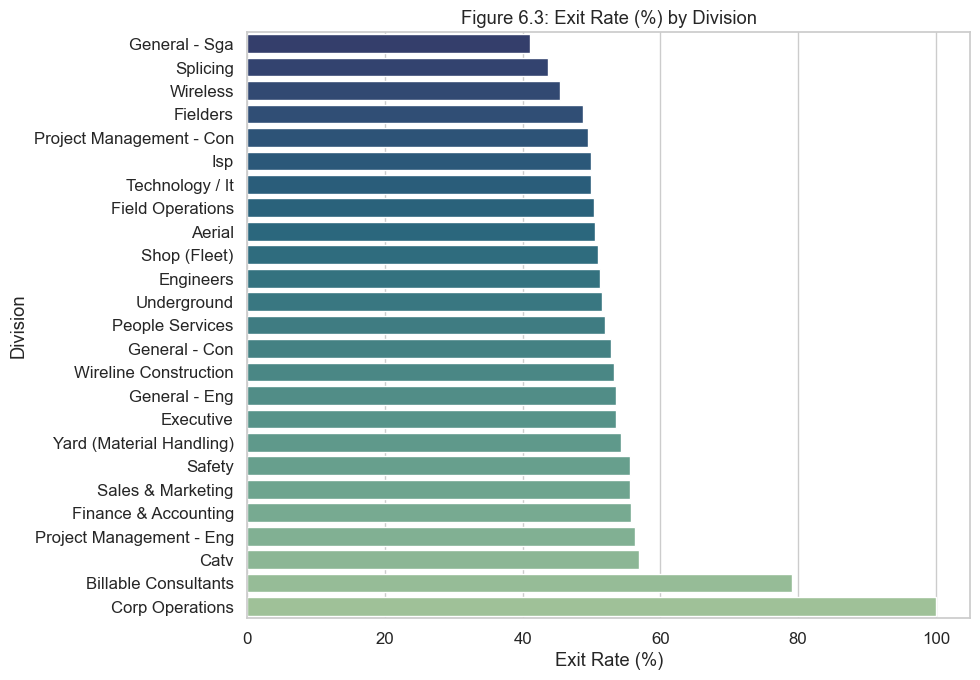

In [21]:
exit_rates = (employee_full.groupby("Division")["Exit Flag"].mean().sort_values().rename("Exit Rate (%)")* 100)
plt.figure(figsize=(10,7))
palette = sns.color_palette("crest_r", n_colors=len(exit_rates))
sns.barplot(x=exit_rates.values, y=exit_rates.index, hue=exit_rates.index, palette=palette, dodge=False, legend=False)
plt.title("Figure 6.3: Exit Rate (%) by Division")
plt.xlabel("Exit Rate (%)")
plt.ylabel("Division")
plt.tight_layout()
plt.show()

### Interpretation
Figure 6.3 shows substantial variation in exit rates across divisions, ranging from approximately 40% to nearly 100% in the highest-turnover areas. This confirms that workforce stability is highly uneven across the organisation.
Comparing Figures 6.2 and 6.3 suggests that low wellbeing does not always correspond directly to the highest exit rates. Some divisions with moderate wellbeing still exhibit elevated turnover, while others with weaker sentiment do not. This indicates that exit behaviour is influenced by additional factors beyond average wellbeing levels alone, warranting further investigation into why employees are leaving.

### 6.4 Exit Reasons
This section examines why employees leave the organisation, helping distinguish between natural attrition and potentially avoidable turnover. Understanding exit reasons is essential for interpreting high exit rates observed across divisions.

#### 6.4.1 Overall Exit Reasons
This subsection summarises exit reasons across the entire organisation to establish a high-level view of why employees leave. By examining the distribution of termination types, we assess whether overall turnover is dominated by expected factors such as retirement or by exits that may reflect retention challenges.

In [22]:
reason_counts = (employee_full.loc[employee_full["Exit Flag"] == 1].groupby("TerminationType").size().rename("Number of Exits").reset_index().sort_values("Number of Exits", ascending=False))
reason_counts["Share (%)"] = (reason_counts["Number of Exits"] / reason_counts["Number of Exits"].sum() * 100).round(1)
reason_counts

,TerminationType,Number of Exits,Share (%)
0,Involuntary,388,25.3
3,Voluntary,388,25.3
1,Resignation,380,24.8
2,Retirement,377,24.6


### Interpretation
The distribution of exit reasons is relatively even across involuntary exits, voluntary exits, resignations, and retirements, with each accounting for roughly a quarter of all departures. While no single exit reason dominates overall turnover, approximately three quarters of exits fall outside retirement, indicating that a substantial share of employee turnover is potentially avoidable. This supports further analysis distinguishing avoidable and non-avoidable exits at the division level.

### 6.4.2 Exit Reasons by Division
This subsection examines how exit reasons vary across divisions by calculating exit rates for each termination type relative to division size. This allows us to identify whether high exit rates in specific divisions are driven by particular types of exits, such as resignations or involuntary terminations, rather than by overall workforce size.

In [23]:
div_reason = (employee_full.loc[employee_full["Exit Flag"] == 1].groupby(["Division", "TerminationType"]).size().rename("Exits").reset_index())
div_totals = employee_full.groupby("Division").size().rename("Division Size").reset_index()
div_reason = div_reason.merge(div_totals, on="Division")
div_reason["Exit Rate (%)"] = (div_reason["Exits"] / div_reason["Division Size"]) * 100
div_reason.sort_values("Exit Rate (%)", ascending=False).head(15)

,Division,TerminationType,Exits,Division Size,Exit Rate (%)
13,Corp Operations,Voluntary,1,2,50.000000
12,Corp Operations,Involuntary,1,2,50.000000
58,Project Management - Eng,Resignation,7,16,43.750000
62,Safety,Retirement,3,9,33.333333
63,Sales & Marketing,Involuntary,3,9,33.333333
4,Billable Consultants,Involuntary,7,24,29.166667
7,Billable Consultants,Voluntary,6,24,25.000000
76,Technology / It,Retirement,6,26,23.076923
48,Isp,Voluntary,3,14,21.428571
46,Isp,Resignation,3,14,21.428571


### Interpretation
Exit rates by termination type vary considerably across divisions. In several divisions, resignations and voluntary exits account for a substantial share of exits relative to division size, indicating that employee-initiated departures contribute meaningfully to overall turnover. Some divisions also show high exit-rate percentages driven by very small workforce sizes, so these figures should be interpreted with caution.

Importantly, no single termination type consistently dominates across all divisions. Retirement-related exits appear in some areas but do not systematically explain the highest exit-rate values. This suggests that elevated turnover in several divisions cannot be attributed solely to natural attrition and warrants further analysis distinguishing avoidable from non-avoidable exits.

### 6.4.3 Age at Exit
This subsection examines employee age at exit across different termination types to assess whether elevated exit rates are primarily driven by late-career or retirement-related departures. If high turnover were mainly explained by workforce ageing, retirement exits would be expected to occur at noticeably higher ages than other exit types.

In [24]:
employee_full["Exit Age"] = (employee_full["ExitDate"] - employee_full["DOB"]).dt.days / 365.25
age_by_reason = (employee_full.loc[employee_full["Exit Flag"] == 1].groupby("TerminationType")["Exit Age"].describe()[["count", "mean", "50%", "min", "max"]].rename(columns={"50%": "median"}))
age_by_reason

,count,mean,median,min,max
TerminationType,,,,,
Involuntary,388.0,51.041047,51.823409,19.137577,81.004791
Resignation,380.0,51.175475,50.132786,18.121834,81.273101
Retirement,377.0,51.458421,50.644764,19.572895,81.218344
Voluntary,388.0,49.348893,48.214921,20.320329,81.697467


### Interpretation
Across all termination types, mean and median exit ages are tightly clustered around 50 years, with only minor differences between voluntary, involuntary, resignation, and retirement exits. This indicates that retirement-related exits are not occurring substantially later in employees’ careers compared to other exit types. The wide range of exit ages observed for all termination categories suggests that age alone does not explain overall exit patterns.

### 6.4.4 Exit Age Distribution by Termination Type
To provide a clearer view of how exit ages are distributed, exit ages are grouped into broad age bands. This allows assessment of whether specific exit reasons are concentrated within particular age ranges or whether exit behaviour is broadly similar across the age distribution.

In [25]:
bins = [0, 35, 50, 60, 120]
labels = ["<35", "35–50", "50–60", "60+"]
employee_full["Exit Age Bucket"] = pd.cut(employee_full["Exit Age"], bins=bins, labels=labels, right=False)
age_bucket_reason = pd.crosstab(employee_full["TerminationType"], employee_full["Exit Age Bucket"])
age_bucket_reason

Exit Age Bucket,<35,35–50,50–60,60+
TerminationType,,,,
Involuntary,102,80,59,147
Resignation,96,93,45,146
Retirement,83,98,61,135
Voluntary,104,103,53,128


### Interpretation
Exit counts are distributed across all age bands for each termination type, including younger (<35) and older (60+) employees. While retirement exits appear slightly more common in later age bands, substantial numbers of voluntary, involuntary, and resignation exits also occur among older employees. Overall, exit behaviour is not confined to specific age groups, reinforcing the conclusion that high exit rates in certain divisions cannot be attributed solely to retirement or workforce ageing.

### 6.5 Avoidable vs Non-avoidable Exits by Division
The earlier analysis showed that exit rates at GlobalWorks are high and uneven across divisions, and that these patterns are not explained by retirement or employee age alone. This section therefore focuses on avoidable exits, isolating turnover that may reflect underlying retention challenges. By combining avoidable exit rates with divisional wellbeing measures, this section links sentiment disparities directly to retention risk.

### 6.5.1 Defining Avoidable Exits
To distinguish between natural attrition and potentially preventable turnover, exits are classified as either avoidable or non-avoidable. Retirement (and other explicitly non-avoidable categories) is treated as non-avoidable, while all remaining exits are considered avoidable. This classification allows exit rates to be recalculated with a focus on retention-relevant departures.

In [26]:
non_avoidable = {"Retirement", "Death", "End Of Contract"}
employee_full["Avoidable Exit"] = employee_full.apply(lambda row: int(row["Exit Flag"] == 1 and str(row["TerminationType"]) not in non_avoidable),axis=1,)
employee_full.loc[employee_full["Exit Flag"] == 1, "Avoidable Exit"].value_counts()

Avoidable Exit
1    1156
0     377
Name: count, dtype: int64

### Interpretation
Of all recorded exits, 1,156 are classified as avoidable and 377 as non-avoidable, meaning that the majority of turnover at GlobalWorks is not driven by retirement or other unavoidable factors. This supports focusing subsequent analysis on avoidable exit rates by division when assessing retention risk.

### 6.5.2 Overall vs Avoidable Exit Rates by Division
This subsection compares overall exit rates with avoidable exit rates across divisions to assess whether high turnover persists after excluding non-avoidable exits such as retirement. Divisions where avoidable exit rates remain high are identified as facing elevated retention risk.

In [27]:
exit_rate_comparison = (employee_full.groupby("Division")[["Exit Flag", "Avoidable Exit"]].mean().rename(columns={"Exit Flag": "Overall Exit Rate","Avoidable Exit": "Avoidable Exit Rate"}))
exit_rate_comparison = (exit_rate_comparison * 100).sort_values("Avoidable Exit Rate", ascending=False)
exit_rate_comparison.head(15)

,Overall Exit Rate,Avoidable Exit Rate
Division,,
Corp Operations,100.000000,100.000000
Billable Consultants,79.166667,75.000000
Project Management - Eng,56.250000,56.250000
Executive,53.488372,51.162791
People Services,52.000000,48.000000
Sales & Marketing,55.555556,44.444444
General - Eng,53.488372,44.186047
Isp,50.000000,42.857143
Fielders,48.780488,41.463415


### Interpretation
Avoidable exit rates closely mirror overall exit rates across most divisions, with only modest reductions after excluding retirement. This indicates that high turnover at GlobalWorks is largely driven by potentially preventable exits, rather than non-avoidable attrition.

### 6.5.3 Divisional Wellbeing and Exit Rates
This subsection examines whether divisions with weaker wellbeing also experience higher exit rates. The analysis is conducted at the division level, comparing average engagement, satisfaction, and work–life balance scores with divisional exit rates. Scatterplots with fitted regression lines are used to assess the strength and direction of these relationships.

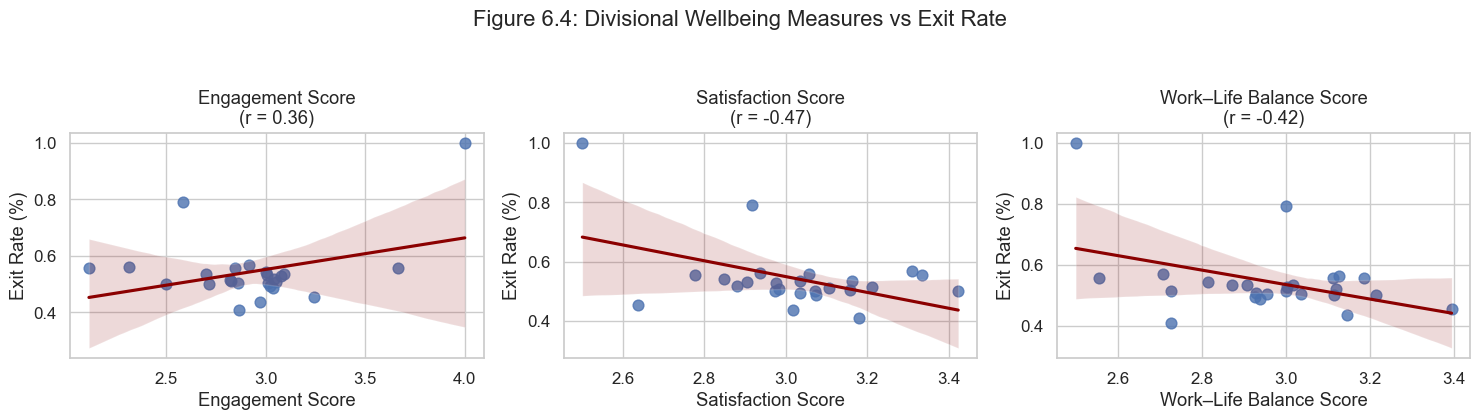

In [28]:
division_scores = (employee_full.groupby("Division")[["Engagement Score", "Satisfaction Score", "Work-Life Balance Score"]].mean())
exit_rates = (employee_full.groupby("Division")["Exit Flag"].mean().rename("exit_rate"))
division_scores_df = (pd.concat([division_scores, exit_rates], axis=1).reset_index())

sns.set_theme(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(15,4))

metrics = [("Engagement Score", "Engagement Score"), ("Satisfaction Score", "Satisfaction Score"), ("Work-Life Balance Score", "Work–Life Balance Score")]

for i, (col, title) in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.regplot(
        data=division_scores_df,
        x=col,
        y="exit_rate",
        scatter_kws={"s": 60},
        line_kws={"color": "darkred"})
    r, _ = stats.pearsonr(division_scores_df[col], division_scores_df["exit_rate"])
    plt.title(f"{title}\n(r = {r:.2f})")
    plt.xlabel(title)
    plt.ylabel("Exit Rate (%)")

plt.suptitle("Figure 6.4: Divisional Wellbeing Measures vs Exit Rate", y=1.05)
plt.tight_layout()
plt.show()

### Interpretation
Figure 6.4 shows that satisfaction and work–life balance have a clearer link to exits than engagement. Divisions with lower satisfaction tend to have higher exit rates (r = −0.47), and a similar pattern is seen for work–life balance (r = −0.42). Engagement shows a weaker and opposite relationship (r = 0.36), meaning higher engagement does not consistently relate to lower exits. This suggests that people are more likely to leave divisions where they feel less satisfied or overworked, rather than simply less engaged.

### 6.5.4 Divisional Wellbeing and Exit Rates
This subsection combines wellbeing measures and exit rates in a single plot to highlight divisions with higher retention risk. Work–life balance is shown against exit rate, with bubble size representing engagement and colour representing satisfaction. Extreme outliers are shown separately to avoid distorting the overall pattern.

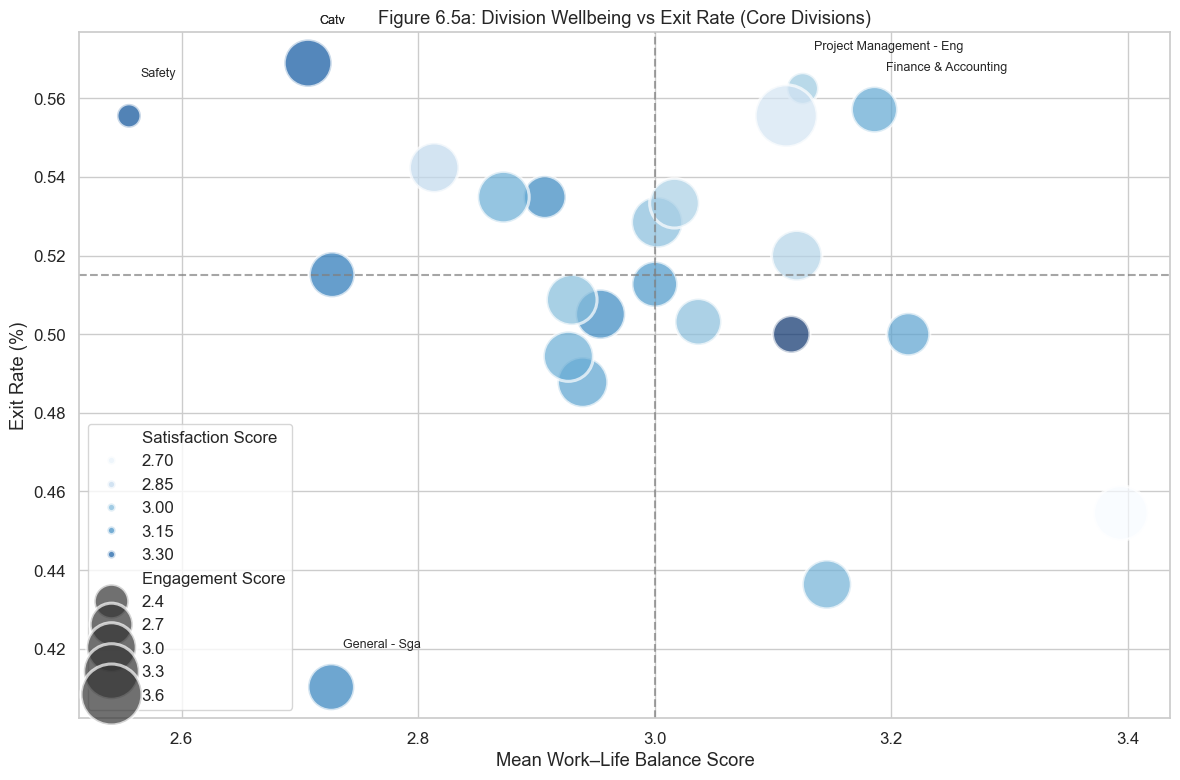

In [29]:
core_divisions = division_scores_df[~division_scores_df["Division"].isin(["Corp Operations", "Billable Consultants"])]
median_wlb = core_divisions["Work-Life Balance Score"].median()
median_exit = core_divisions["exit_rate"].median()
plt.figure(figsize=(12,8))

sns.scatterplot(
    data=core_divisions,
    x="Work-Life Balance Score",
    y="exit_rate",
    size="Engagement Score",
    hue="Satisfaction Score",
    sizes=(300, 2000),
    palette="Blues",
    alpha=0.7,
    legend=True)

important = pd.concat([core_divisions.sort_values("exit_rate", ascending=False).head(3),core_divisions.sort_values("Work-Life Balance Score").head(3)])

for _, row in important.iterrows():
    plt.text(
        row["Work-Life Balance Score"] + 0.01,
        row["exit_rate"] + 0.01,
        row["Division"],
        fontsize=9)

plt.axvline(median_wlb, color="grey", linestyle="--", alpha=0.7)
plt.axhline(median_exit, color="grey", linestyle="--", alpha=0.7)
plt.title("Figure 6.5a: Division Wellbeing vs Exit Rate (Core Divisions)")
plt.xlabel("Mean Work–Life Balance Score")
plt.ylabel("Exit Rate (%)")
plt.tight_layout()
plt.show()

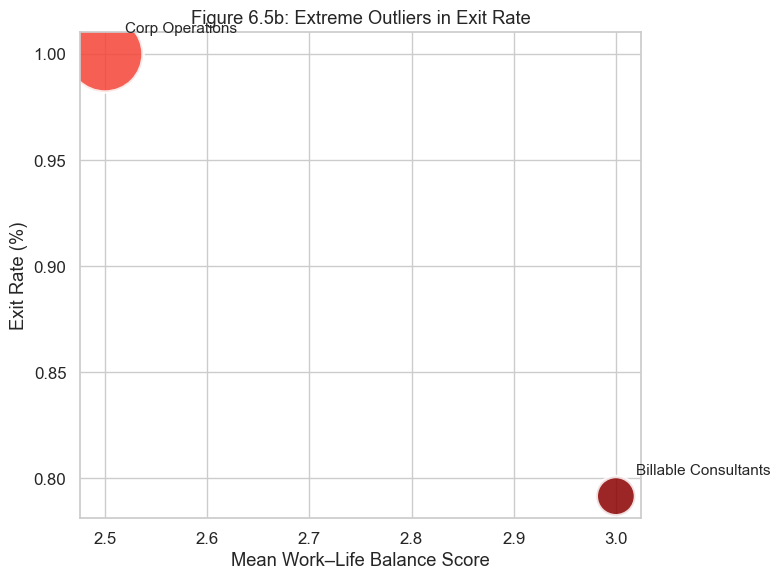

In [30]:
outliers = division_scores_df[division_scores_df["Division"].isin(["Corp Operations", "Billable Consultants"])]

plt.figure(figsize=(8,6))

sns.scatterplot(
    data=outliers,
    x="Work-Life Balance Score",
    y="exit_rate",
    size="Engagement Score",
    hue="Division",
    sizes=(800, 3000),
    palette={"Corp Operations": "#f44336", "Billable Consultants": "#8b0000"},
    alpha=0.85,
    legend=False)

for _, r in outliers.iterrows():
    plt.text(
        r["Work-Life Balance Score"] + 0.02,
        r["exit_rate"] + 0.01,
        r["Division"],
        fontsize=11)

plt.title("Figure 6.5b: Extreme Outliers in Exit Rate")
plt.xlabel("Mean Work–Life Balance Score")
plt.ylabel("Exit Rate (%)")
plt.tight_layout()
plt.show()

### Interpretation
Figure 6.5a shows that several divisions fall into the high-exit, low–work-life-balance area, meaning they combine weaker wellbeing with higher turnover. Safety is the clearest example of this pattern. Other divisions, such as Project Management (Eng) and Finance & Accounting, show high exit rates despite average wellbeing, suggesting that factors beyond the survey scores may also be driving exits.

Figure 6.5b shows that Corp Operations and Billable Consultants sit far outside the main pattern, with extremely high exit rates. Showing them separately makes it clear that these divisions require targeted attention rather than general organisation-wide actions.

## 6.6 Priority Divisions for Intervention
This section brings together the evidence from the wellbeing analysis, exit rates, and avoidable exit patterns to identify where retention efforts should be prioritised. The results show that retention challenges at GlobalWorks are concentrated in specific divisions, rather than spread evenly across the organisation.

The following divisions show a clear combination of weaker wellbeing and higher (avoidable) exit rates, indicating elevated retention risk:
- Safety: Consistently low work–life balance and satisfaction, combined with a high exit rate. This suggests workload pressure and limited support in frontline roles.
- Project Management – Engineering: High exit rates alongside weaker satisfaction, despite moderate engagement. This points to structural or role-related pressures rather than low motivation alone.
- Finance and Accounting: Higher-than-expected exit rates relative to wellbeing levels, with satisfaction below the organisational median, suggesting misalignment between expectations and working conditions.

### Moderate-Risk Divisions
Several divisions show mixed patterns, where some wellbeing measures are strong but others indicate potential risk:
- Technology / IT
- Field Operations
- People Services
- Aerial
- Engineers

These divisions sit close to the organisational median for both wellbeing and exit rates and may benefit from targeted monitoring rather than immediate intervention.

### Lower-Risk Divisions
Divisions with stronger wellbeing scores and lower exit rates appear more stable:
- General – SGA
- General – ENG
- Sales and Marketing
- Splicing
- Wireless

These areas combine above-average wellbeing with relatively lower turnover, suggesting healthier working environments.

### Summary
Overall, the analysis shows that retention risk at GlobalWorks is driven by divisional conditions rather than individual factors alone. Divisions with lower work–life balance and satisfaction tend to experience higher avoidable turnover, highlighting the need for targeted, division-specific interventions rather than organisation-wide solutions.

## 8. Conclusion
This project examined how employee wellbeing varies across divisions at GlobalWorks and how these differences relate to exit behaviour. The analysis showed substantial variation in engagement, satisfaction, and work–life balance across divisions, alongside large differences in exit rates. Importantly, high turnover persisted even after excluding retirements, confirming that exit risk is largely driven by avoidable factors.

While no single wellbeing measure fully explains exit behaviour on its own, divisions with weaker satisfaction and poorer work–life balance consistently experienced higher avoidable exit rates. The results indicate that retention challenges at GlobalWorks are concentrated in specific divisions and are closely linked to divisional working conditions, rather than individual characteristics. This highlights the need for targeted, division-level retention strategies.

## 9. Limitations and Improvements
This analysis is based on synthetic, cross-sectional data, which limits the ability to draw causal conclusions about why employees leave. Wellbeing measures are self-reported and may be influenced by response bias or temporary sentiment at the time of the survey. In addition, division-level averages can mask important variation within teams or roles.

Future improvements could include incorporating longitudinal data to track changes in wellbeing before exits occur, adding role-level or manager-level information, and distinguishing between different types of voluntary exits. Including additional variables such as pay progression, workload intensity, or promotion opportunities could also provide a more complete view of retention drivers.

## 10. Areas for Further Research
Further research could explore how changes in wellbeing over time relate to subsequent exits, rather than relying on general averages. A deeper role-level or team-level analysis may help identify more specific sources of pressure within high-risk divisions. Future work could also examine how training participation, career development, and internal mobility interact with wellbeing and retention outcomes. Finally, combining quantitative analysis with qualitative insights, such as exit interviews or employee feedback, would help validate the findings from this EDA.